In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 1


In [61]:
tmp_df = []

with open("Data_EX1.txt", 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        tmp_df.append(line[5:-1].split("  "))

df = pd.DataFrame(tmp_df)
del tmp_df
df.drop([31,32,33,34,35,36], axis='index', inplace=True)

for i in range(12):
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].replace(99.0, np.nan)
    df[i] = df[i].replace(-99.0, np.nan)

In [108]:
time_range = range(df.shape[1])
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]

# mean of each month
month_mean = [np.nanmean(df[x].to_numpy()) for x in range(12)]
# text position
text_y = [x - 1.5 if x < 20.5 else x + 0.5 for x in month_mean]
text_y[1] -= 0.7
# range of each month
month_min = [np.nanmin(df[x]) for x in range(12)]
month_max = [np.nanmax(df[x]) for x in range(12)]

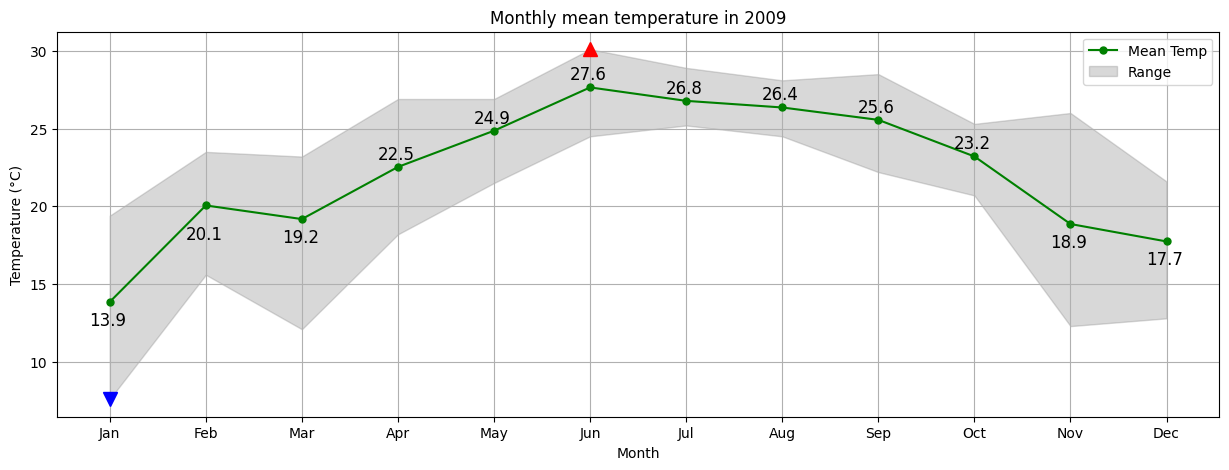

In [113]:
# plot
plt.figure(figsize=(15,5))


#middle line
plt.plot(time_range,month_mean, marker='.', markersize=10, linestyle='solid', color="green", label="Mean Temp")
# plt.scatter(time_range, month_mean, color='green', label='dots', zorder=3)
# Add text labels next to the points
for i in range(len(time_range)):
    plt.text(time_range[i] - 0.21, text_y[i], str(np.round(month_mean[i],1)), fontsize=12)
# range
plt.plot(time_range,month_min, linestyle='solid', alpha=0)
plt.plot(time_range,month_max, linestyle='solid', alpha=0)
plt.fill_between(time_range, month_max, month_min, color='gray', alpha=0.3, label='Range')
# min max
plt.plot(time_range[5], month_max[5], marker='^', markersize=10, color='red')
plt.plot(time_range[0], month_min[0], marker='v', markersize=10, color='blue')
# other 
plt.legend()
plt.xticks(time_range, months)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly mean temperature in 2009")
plt.grid()

#### Exercise 2

Text(0.5, 1.0, 'Daily Temperature Heatmap in 2009')

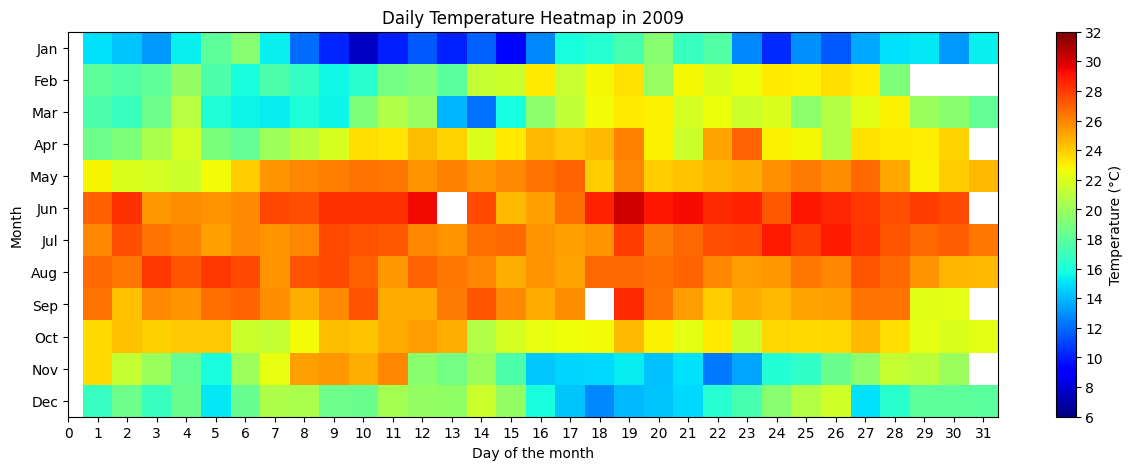

In [130]:
x_axis = np.arange(1,32,1)
y_axis = np.arange(1,13,1)
data = df.T[::-1]
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

plt.figure(figsize=(15,5))
cm = plt.pcolormesh(x_axis, y_axis, data, cmap = 'jet', vmin=6, vmax=32)      #this is the pcolormesh

plt.xticks(range(32),range(32))
plt.yticks(range(12,0,-1), months)

cbar = plt.colorbar(cm)
cbar.set_label('Temperature (°C)')
cbar.set_ticks(range(6,33,2))  # Positions of ticks
cbar.set_ticklabels(range(6,33,2))

plt.ylabel("Month")
plt.xlabel("Day of the month")
plt.title("Daily Temperature Heatmap in 2009")

#### Exercise 3


Text(0, 0.5, 'Temperature (oC)')

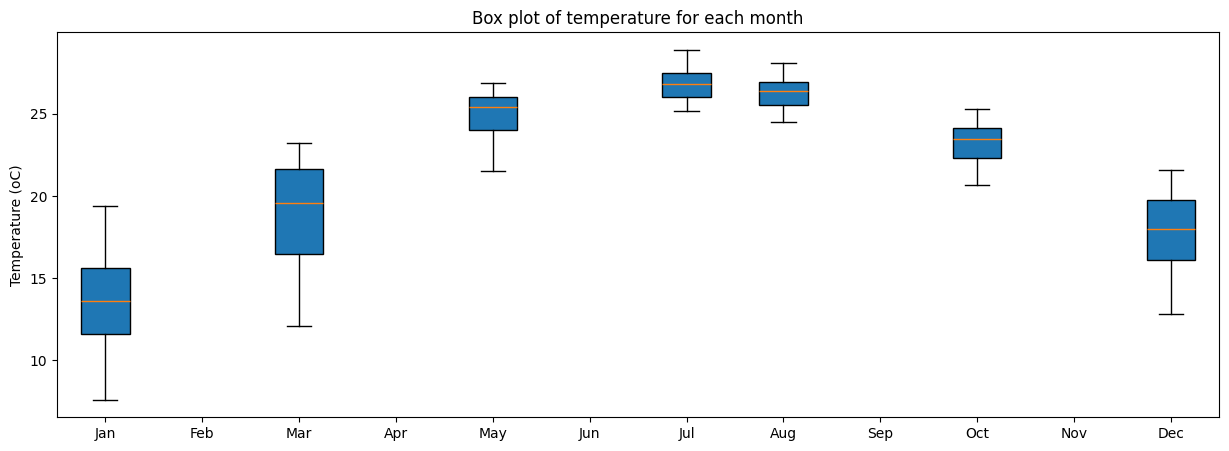

In [138]:
plt.figure(figsize=(15,5))
plt.boxplot([df[x].to_list() for x in range(12)], vert=True, patch_artist=True, labels=months)
# plt.xticks(list(range(1,13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Box plot of temperature for each month")
plt.ylabel("Temperature (oC)")

In [136]:
df.shape

(31, 12)